Iris dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set


Paper: https://rcs.chemometrics.ru/old/Tutorials/classification/Fisher.pdf

In [2]:
import seaborn as sns
from sklearn.feature_selection import SelectKBest

data = sns.load_dataset('iris')
y = data['species']
X = data
del X['species']
print(set(y))
X.head()

{'versicolor', 'setosa', 'virginica'}


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
kbest = SelectKBest(k=2).fit(X, y) #Originally we set K equal to 1.
#This is a supervised fit. Here, it used a test call F-test.
print('selected:',X.columns[kbest.get_support()]) #Select the "Best" Features, assuming independence, which isn't always a good asssumption.

selected: Index(['petal_length', 'petal_width'], dtype='object')


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy
from sklearn.metrics import accuracy_score
#Train a model
forest = RandomForestClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)#split train test
forest.fit(X_train, y_train) #Fitting a model after splitting to train and test.

#We know ask the model to rank the features based on importance. 
print(dict(zip(X.columns,forest.feature_importances_))) #print the feature importance found by random forest
best_feature = X.columns[numpy.argmax(forest.feature_importances_)]
print(f'best single feature: {best_feature}')

print('score with all features')
print(accuracy_score(y_test, forest.predict(X_test))) #This is the accurracy score for all of the features.

{'sepal_length': 0.0983732282540144, 'sepal_width': 0.040953940122995136, 'petal_length': 0.4093868247751606, 'petal_width': 0.4512860068478299}
best single feature: petal_width
score with all features
0.98


In [6]:
#Now, we will just use one feature.
print('score with a single feature:')
X_train_new = X_train[[best_feature]]
X_test_new = X_test[[best_feature]]
forst_single = RandomForestClassifier(random_state=0).fit(X_train_new,y_train)
accuracy_score(y_test, forst_single.predict(X_test_new))

score with a single feature:


0.98

See how we got the exact same score in this example. Often though, it will be less if we just take one feature. However, this still deomonstrates that we don't necessarily need all of the dimensions, even if we were given them.

# Anyone familiar with another method for finding feature importance?

# Back to slides

In [7]:
def plot_image(orig,transformed=None):
    plt.subplot(1, 2, 1);
    plt.imshow(orig.reshape(28,28))
    plt.title('Original Image', fontsize = 20);
    if transformed is not None:
        plt.subplot(1, 2, 2);
        plt.imshow(transformed.reshape(28, 28))
        plt.title('Transformed', fontsize = 20);

In [9]:
from sklearn.decomposition import PCA
from keras.datasets import mnist,fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_size=60000
test_szie=10000
image_w=28
image_h=28


4423680/4422102 [==============================] - 1s 0us/step


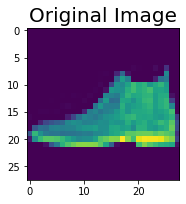

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_image(x_test[0])

# Reshape into array (flat)

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
#reshaping the data into 1D
x_train = x_train.reshape(len(x_train),image_h*image_w)
x_test = x_test.reshape(len(x_test),image_h*image_w)
x_train.shape

(60000, 784)

In [13]:
#normalizing the data-- always normalzie before doing PCA, in order to center it around 0. We want all dimensions to be around the center.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True,with_std=True) #normalizes using standardization.
scaler.fit(x_train) #In the fit, it learns the mean and variance.
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train.var(axis=0)[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
#reduce each image into 100 dim array instead of 784
#PCA eliminates coorelation in the data. If one pixel is always 0, and another is always 1, it will only use one of them.
pca = PCA(100)
pca.fit(x_train)
TRAIN= pca.transform(x_train)
TEST = pca.transform(x_test)
TRAIN.shape

(60000, 100)

We lost information (intentionally). If we want to print the images , we don't really know how to do so. What we want to do, is transform this lower dimensionality data into a different representation, just so we can print it.

In [15]:
#Return to original representation
#Remebed: data which was discarded (684 feautres) is already gone!
approximation = pca.inverse_transform(TEST)
approximation.shape

(10000, 784)

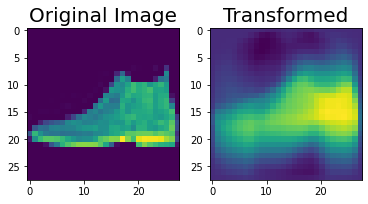

In [17]:
#original Vs compressed
plot_image(scaler.inverse_transform(x_test)[0],scaler.inverse_transform(approximation)[0])


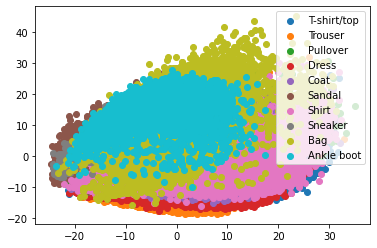

In [16]:
#Why do i want 2 dimensions? Why is it useful?
pca = PCA(2)
pca.fit(x_train)
TRAIN= pca.transform(x_train)
TEST = pca.transform(x_test)
approximation = pca.inverse_transform(TEST)


### 
plots=[]
for y,name in enumerate(class_names):
    new_set = TRAIN
    X=np.array([x for i,x in enumerate(new_set[:, 0]) if y_train[i]==y]).reshape(-1)
    Y=np.array([x for i,x in enumerate(new_set[:, 1]) if y_train[i]==y]).reshape(-1)
    p= plt.scatter(X, Y)
    plots.append(p)
plt.legend(plots,class_names)
plt.show()

# Back to slides

In [18]:
#Data is taken from the slides
#If we take the data and fit the PCA into the data, we get
import pandas as pd
data = pd.read_json('{"A":{"0":1.0,"1":0.86,"2":0.49,"3":0.65},"B":{"0":0.86,"1":1.0,"2":-0.01,"3":0.19},"C":{"0":0.49,"1":-0.01,"2":1.0,"3":0.98},"D":{"0":0.65,"1":0.19,"2":0.98,"3":1.0}}')
print(data.head())
data = data.values


      A     B     C     D
0  1.00  0.86  0.49  0.65
1  0.86  1.00 -0.01  0.19
2  0.49 -0.01  1.00  0.98
3  0.65  0.19  0.98  1.00


In [19]:
#This is the lower dimensional representation of the data.
pca = PCA(2)
data = data-data.mean(axis=1)
pca.fit(data)
print(pca.transform(data))

[[ 0.37318207  0.25373563]
 [ 0.9368777  -0.17409612]
 [-0.73644195 -0.13962635]
 [-0.57361781  0.05998684]]


# What did the PCA object learned?
What did the object use for the transform operation?
What mathematical operation was used in the transform?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>




In [20]:
np.dot(data, pca.components_.T)
#The transform just does this.
#Represented here is the eigenvectors of the covariance of the data.

array([[ 0.37318207,  0.25373563],
       [ 0.9368777 , -0.17409612],
       [-0.73644195, -0.13962635],
       [-0.57361781,  0.05998684]])

# Back to slides

# Choosing the number of components

In [21]:
pca = PCA(image_w*image_h)
pca.fit(x_train)

PCA(n_components=784)

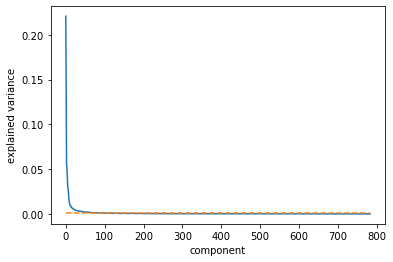

In [22]:
plt.plot(pca.explained_variance_ratio_)

plt.plot(range(len(pca.explained_variance_ratio_)),[pca.explained_variance_ratio_.mean()]*len(pca.explained_variance_ratio_), label='Mean', linestyle='--')
plt.xlabel('component')
plt.ylabel('explained variance');


We see already, that a relatively small number of compnenets explain msot of the variance

# Where is the elbow?

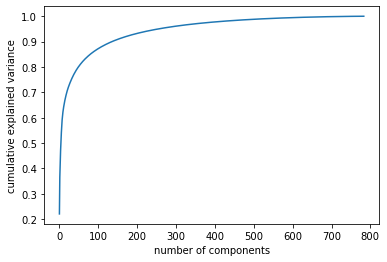

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #This is the cumulative Variance of the components

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Where is the elbow here?

# Back to slides

# Locally Linear Embedding

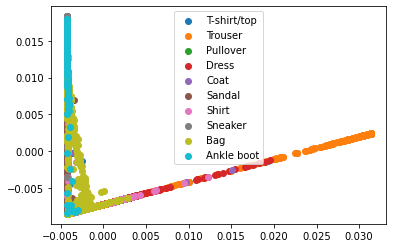

<bound method LocallyLinearEmbedding.transform of LocallyLinearEmbedding()>

In [29]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2,n_neighbors=5)
X_transformed_lle = embedding.fit_transform(x_train[:10000])


plots=[]
for y,name in enumerate(class_names):    
    X=np.array([x for i,x in enumerate(X_transformed_lle[:, 0]) if y_train[i]==y])
    Y=np.array([x for i,x in enumerate(X_transformed_lle[:, 1]) if y_train[i]==y])
    p= plt.scatter(X, Y)
    plots.append(p)
plt.legend(plots,class_names)
plt.show()
embedding.transform
#Does the result look good?

# Back to slides

# t-SNE

In [30]:
subset=1000#using subset to save time.

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


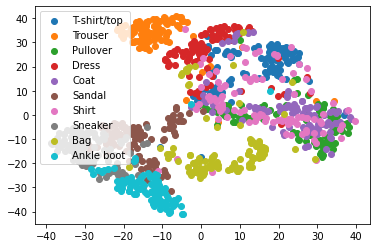

In [31]:

from sklearn.manifold import TSNE
tsne=TSNE(n_components=2) #n_iter=250
TRAIN = tsne.fit_transform(x_train[:subset])
plots=[]
for y,name in enumerate(class_names):    
    X=np.array([x for i,x in enumerate(TRAIN[:, 0]) if y_train[i]==y])
    Y=np.array([x for i,x in enumerate(TRAIN[:, 1]) if y_train[i]==y])
    p= plt.scatter(X, Y)
    plots.append(p)
plt.legend(plots,class_names)
plt.show()


# How about just tranforming new data now??

###### We can't do so. We have to optimize the whole dataset again in order to add in new data

# back to slides

# UMAP

In [33]:
!pip install umap-learn
#umap is not a part of sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=1a2663542d21d9849f661280c63c2972cc83fe09d0ef7caf877c9dc03f6d38d5
  Stored in directory: c:\users\sfrie\appdata\local\pip\cache\wheels\84\1b\c6\aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=75fb1b4dc81654a76cd964e7cf159fd29eba6b838a07f9a582b3df8cc096ebb1
  Stored in directory: c:\users\sfrie\appdata\local\pip\cache\wheels\af\e9\33\04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


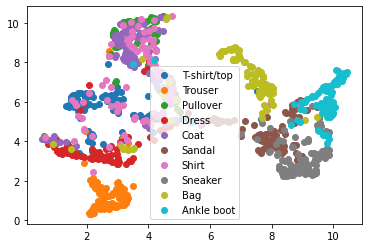

In [34]:
import umap

umap = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="euclidean") #those are deafult params in the package
TRAIN = umap.fit_transform(x_train[:subset])


plots=[]
for y,name in enumerate(class_names):    
    X=np.array([x for i,x in enumerate(TRAIN[:, 0]) if y_train[i]==y])
    Y=np.array([x for i,x in enumerate(TRAIN[:, 1]) if y_train[i]==y])
    p= plt.scatter(X, Y)
    plots.append(p)
plt.legend(plots,class_names)
plt.show()
